In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import scipy.ndimage.filters as filters


from PIL import Image


In [2]:
K = 1
sigma = 1
r = np.array([-1, 0, 1])

G = K * np.exp(- r ** 2 / (2 * sigma ** 2))
G


array([0.60653066, 1.        , 0.60653066])

In [3]:
m = 3
sigma = 1
x = np.linspace(-(m - 1) / 2., (m - 1) / 2., m)
gauss = np.exp(-0.5 * np.square(x) / np.square(sigma))
kernel = np.outer(gauss, gauss)

kernel = kernel

print(gauss)
print(kernel)


[0.60653066 1.         0.60653066]
[[0.36787944 0.60653066 0.36787944]
 [0.60653066 1.         0.60653066]
 [0.36787944 0.60653066 0.36787944]]


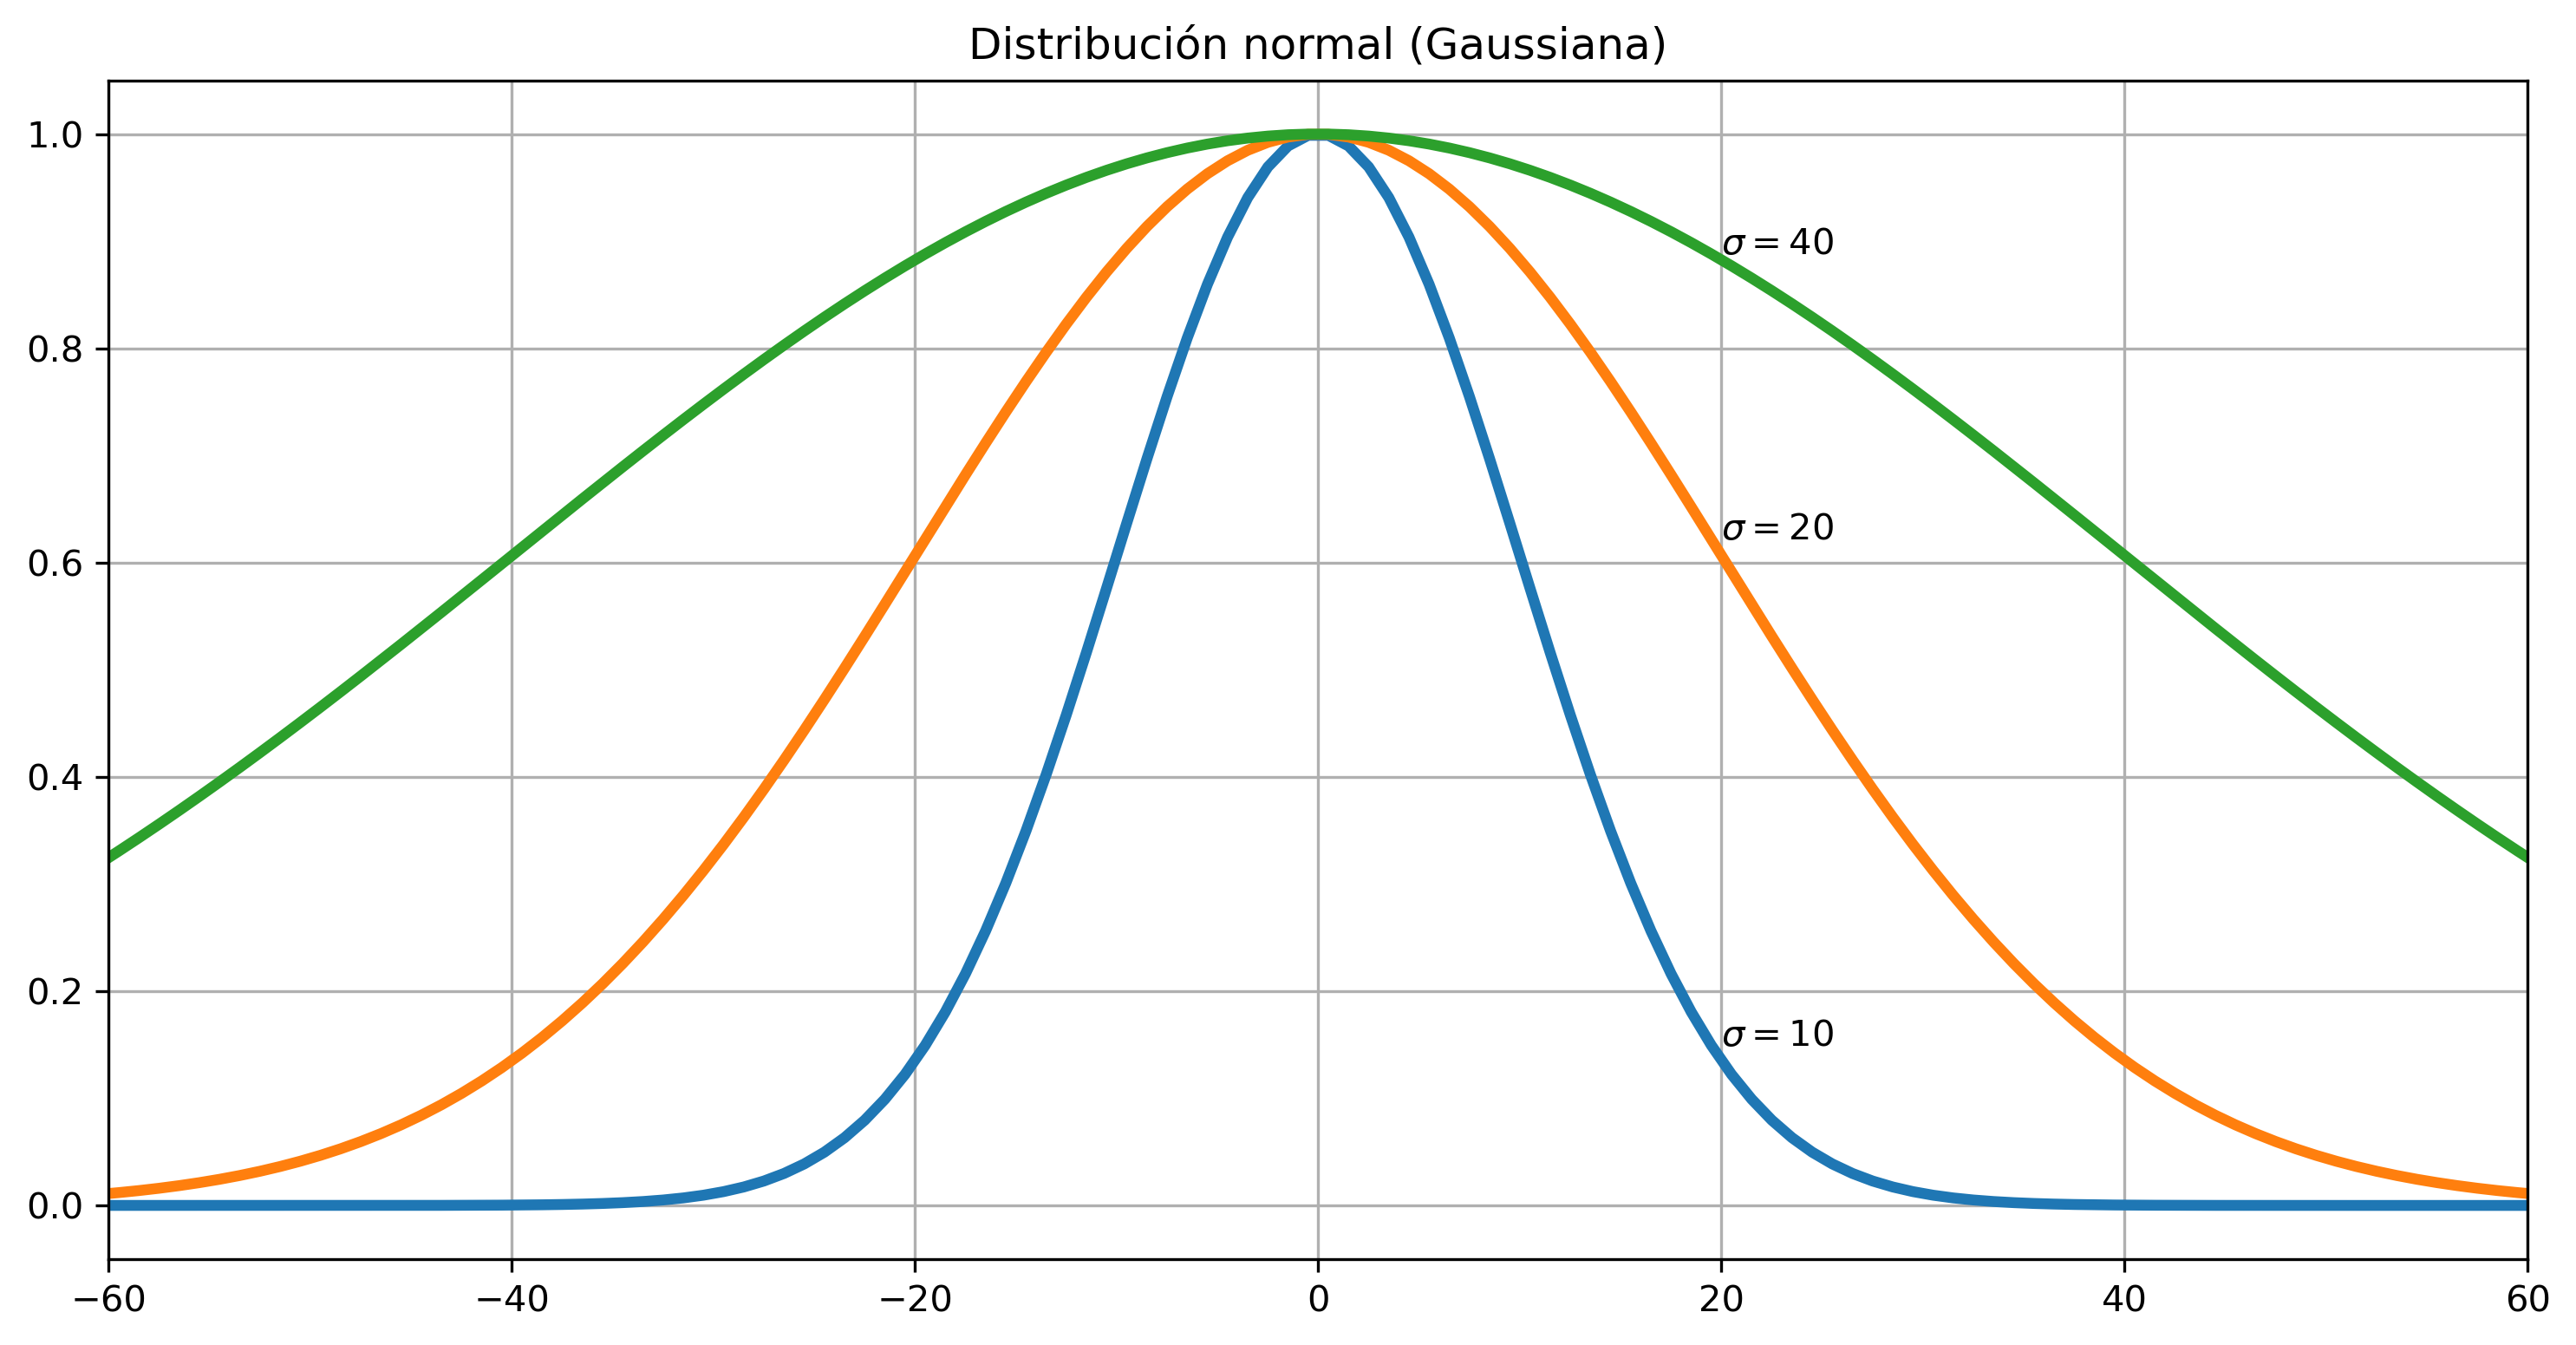

In [4]:
plt.figure(figsize=(12, 6), dpi=300)
plt.title("Distribución normal (Gaussiana)")
plt.xlim([-60, 60])
plt.grid()
m = 130

for sigma in [10, 20, 40]:
    ax = np.linspace(-(m - 1) / 2., (m - 1) / 2., m)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    plt.plot(ax, gauss, linewidth=3)
    plt.text(20, gauss[20 - int(min(ax))], f"$\sigma = {sigma}$")

plt.savefig("outputs/dimp 09 pdf gauss.png")


In [5]:
def gaussian_kernel(m=5, sigma=1):
    ax = np.linspace(-(m - 1) / 2., (m - 1) / 2., m)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)


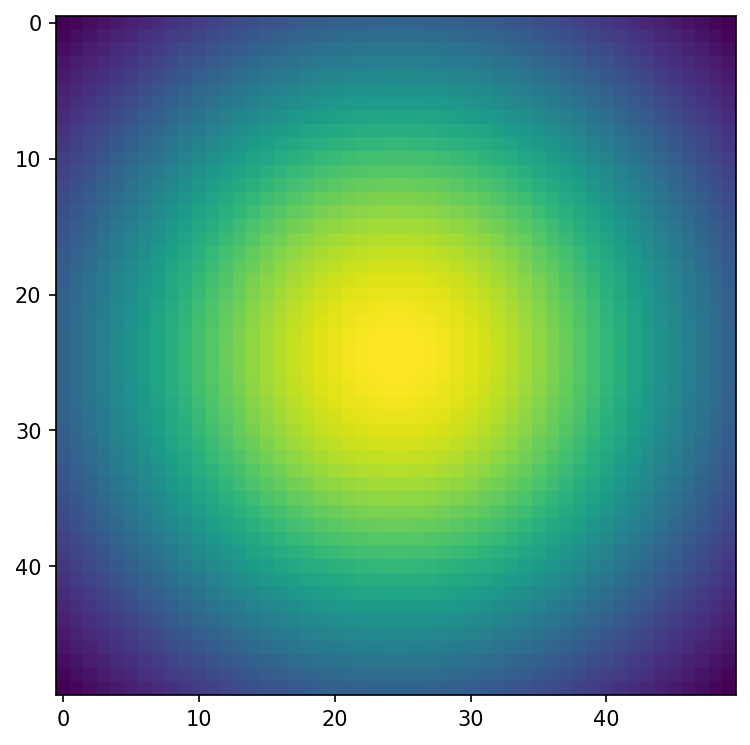

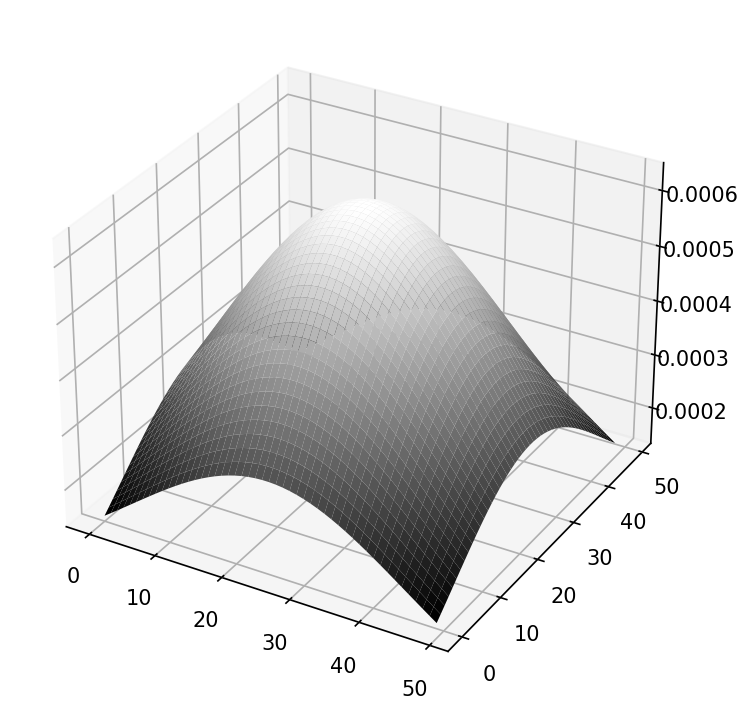

In [6]:
plt.figure(figsize=(6, 6), dpi=150)
kernel = gaussian_kernel(50, 20)

plt.imshow(kernel)

plt.savefig("outputs/dimp 09 - kernel.png")

Y = np.arange(0, kernel.shape[0])
X = np.arange(0, kernel.shape[1])

X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(
    subplot_kw={"projection": "3d"}, figsize=(6, 6), dpi=150)
ax.plot_surface(X, Y, kernel, cmap="gray", linewidth=0, antialiased=True)

fig.savefig("outputs/dimp 09 kernel 3d")


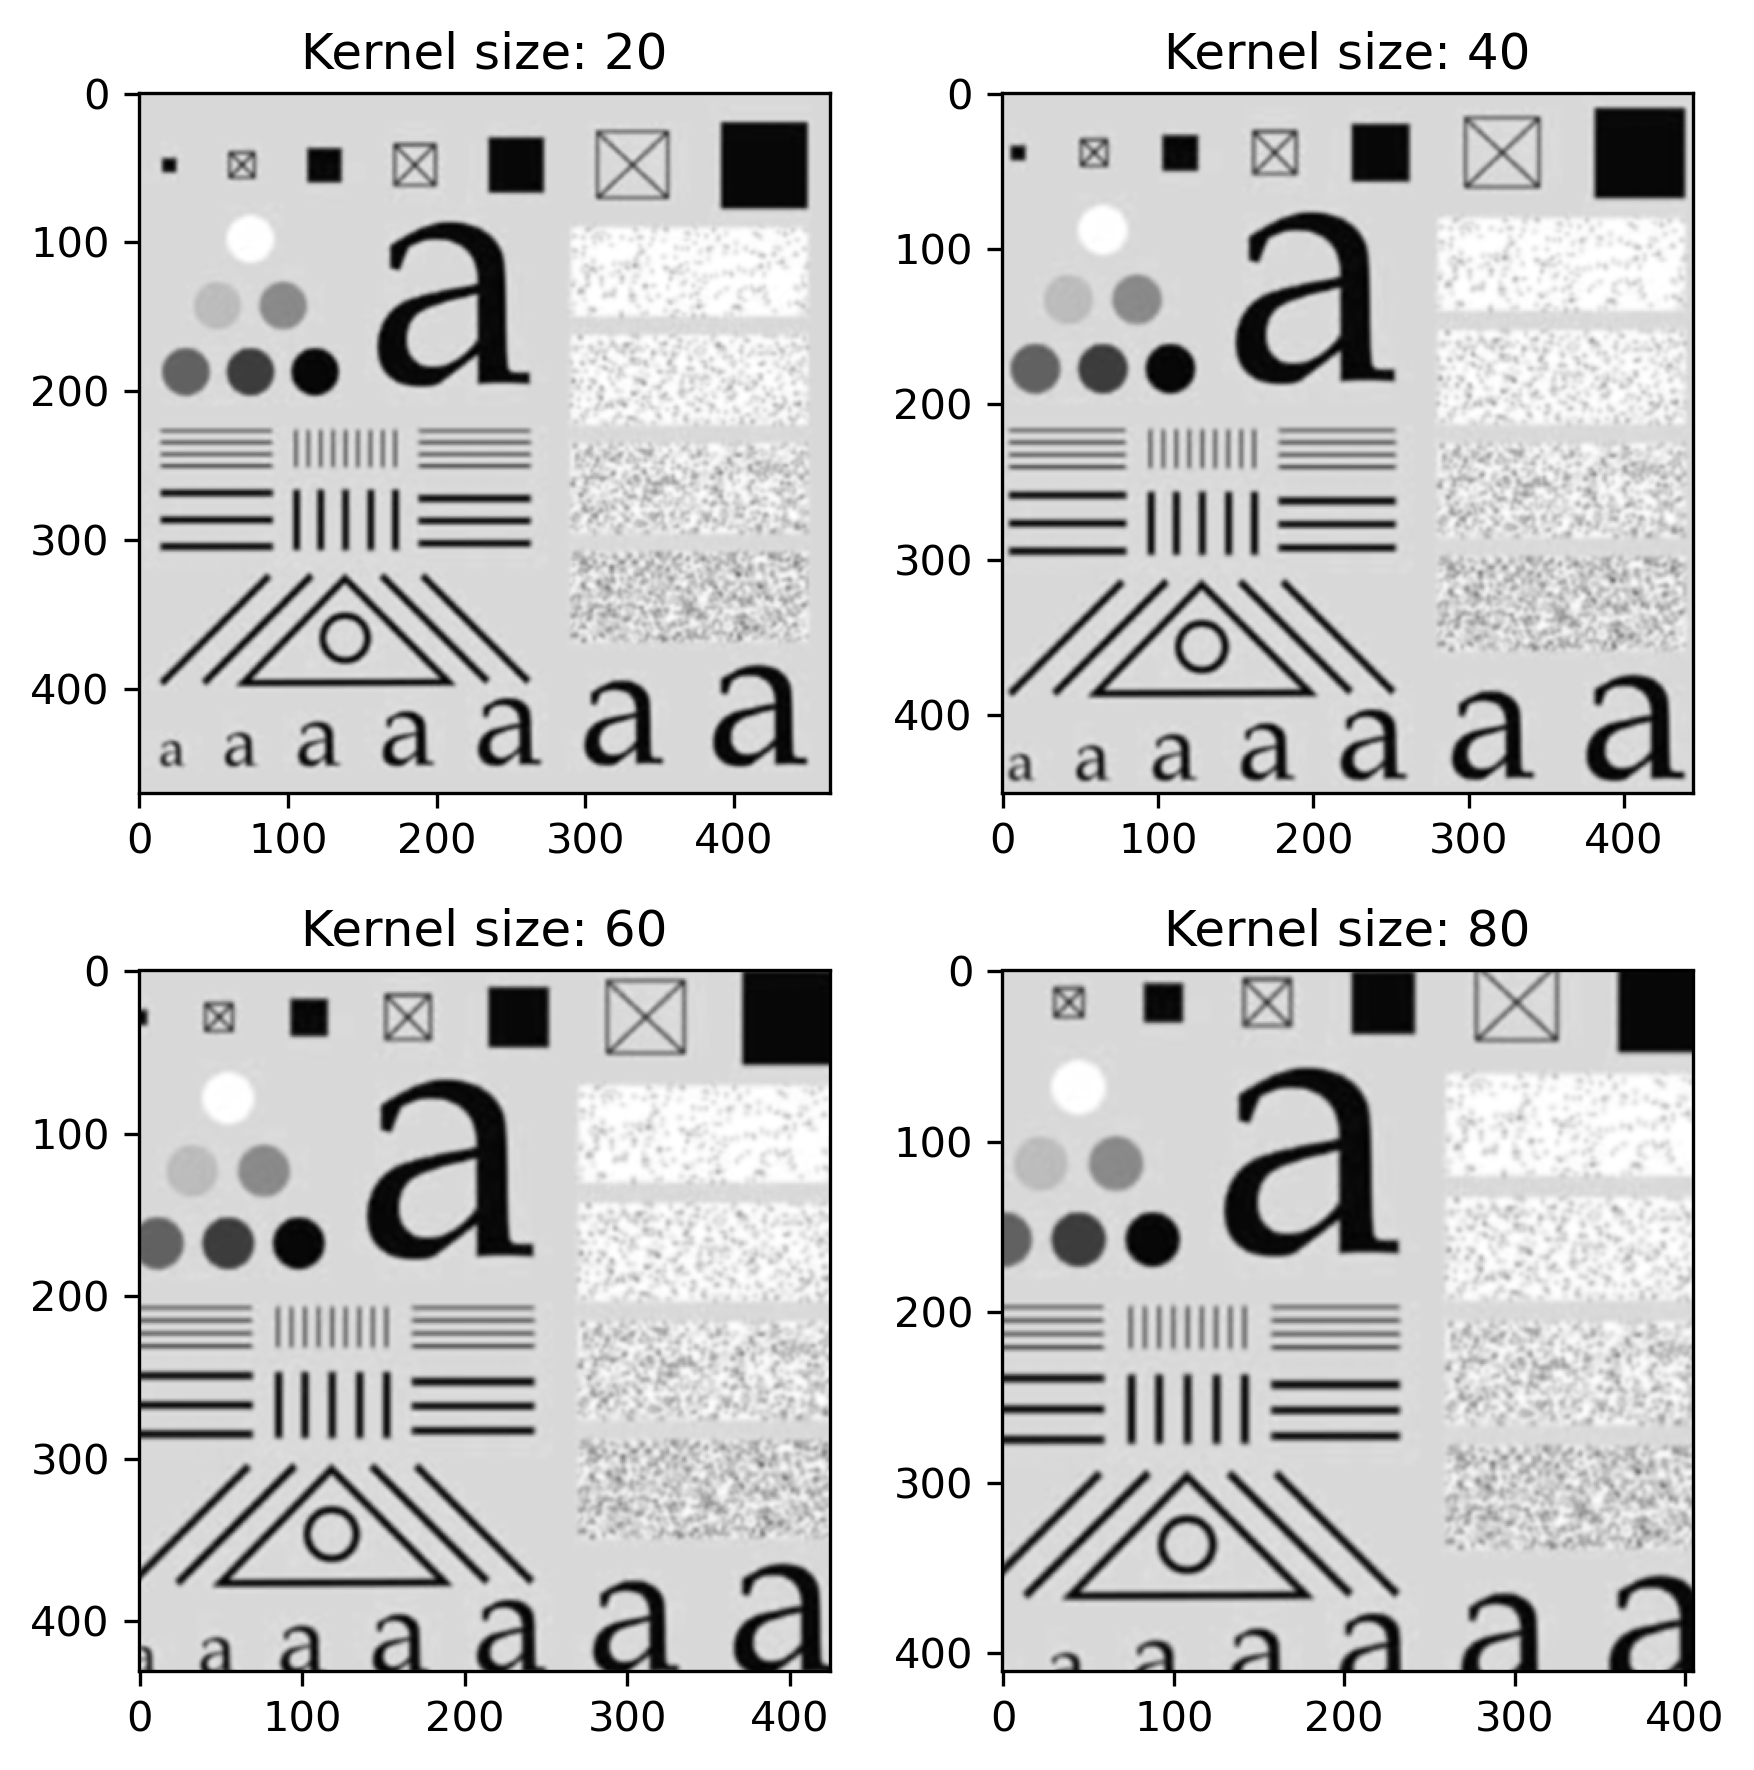

In [7]:
A = Image.open("images/07/pattern.png").convert("L")
A = np.asarray(A)


plt.figure(figsize=(6, 6), dpi=300)
kernel_sizes = [20, 40, 60, 80]

for i, k in enumerate(kernel_sizes):
    kernel = gaussian_kernel(k, sigma=1)
    C = scipy.signal.convolve(A, kernel, mode="valid")

    plt.subplot(2, 2, i + 1)
    plt.imshow(C, cmap="gray")
    plt.title(f"Kernel size: {k}")
plt.tight_layout()

plt.savefig("outputs/dimp 09 gaussian kernel various sizes.png")


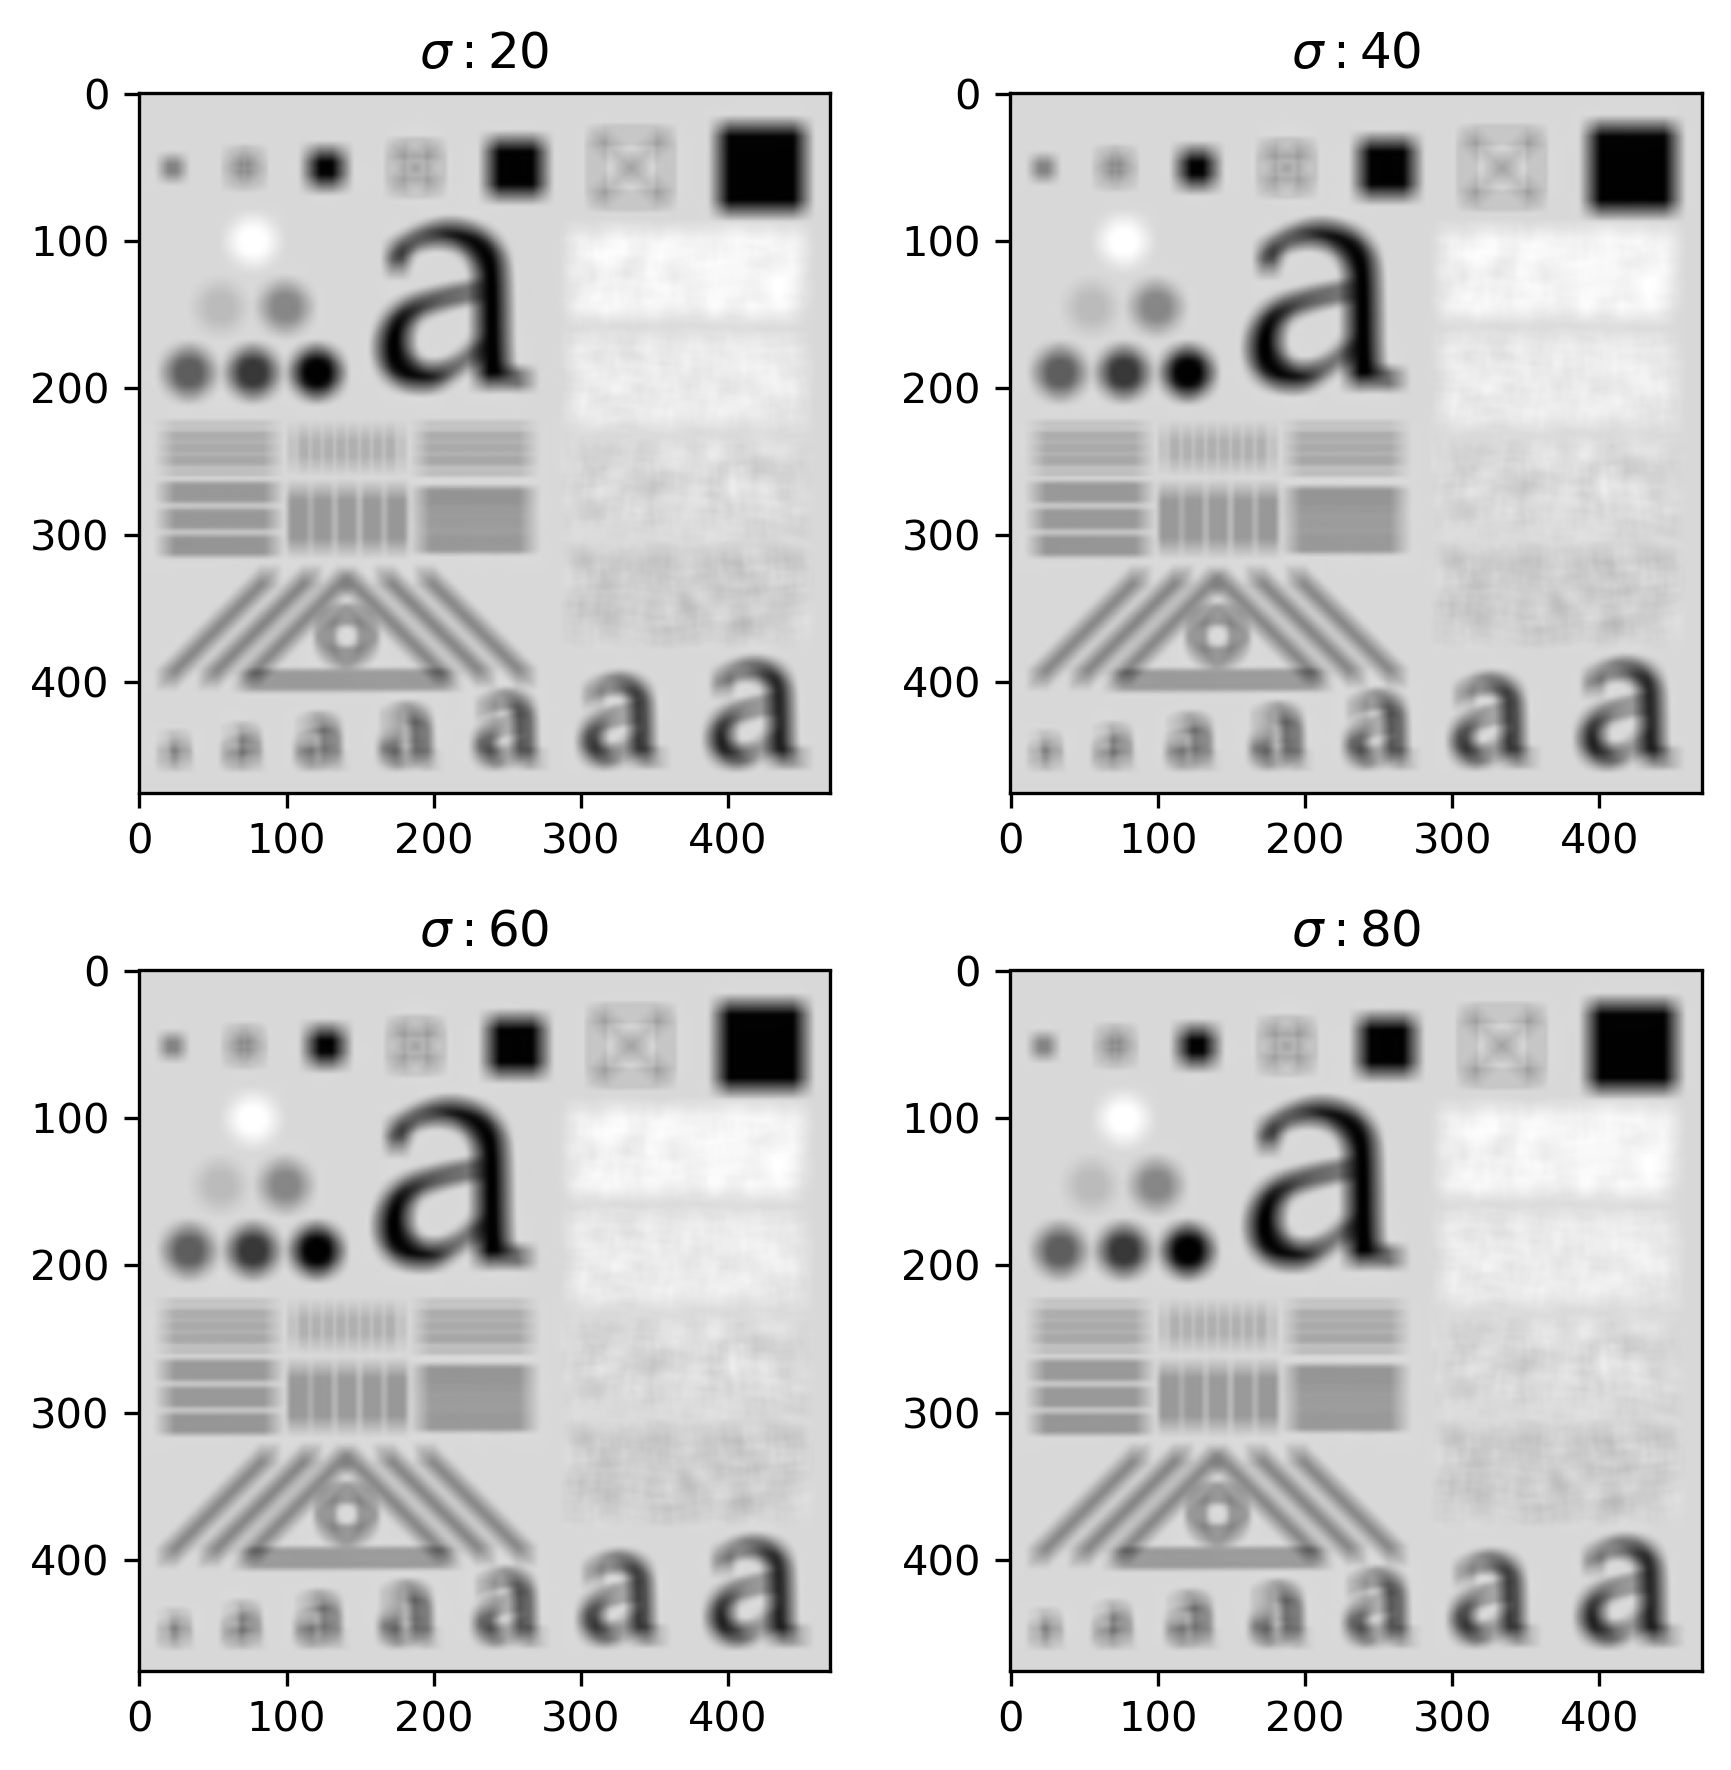

In [8]:
A = Image.open("images/07/pattern.png").convert("L")
A = np.asarray(A)


plt.figure(figsize=(6, 6), dpi=300)
sigma_sizes = [20, 40, 60, 80]

for i, k in enumerate(sigma_sizes):
    kernel = gaussian_kernel(15, sigma=k)
    C = scipy.signal.convolve(A, kernel, mode="valid")

    plt.subplot(2, 2, i + 1)
    plt.imshow(C, cmap="gray")
    plt.title(f"$\sigma: {k}$")
plt.tight_layout()

plt.savefig("outputs/dimp 09 gaussian kernel various sigma sizes.png")


## Aplicaciones prácticas del filtrado por medio del filtro gaussiano

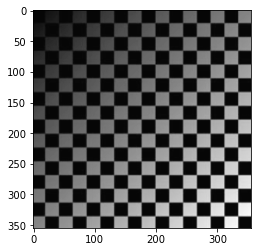

In [9]:
A = Image.open("images/checkers.png").convert("L")

A = np.asarray(A)

plt.imshow(A, cmap="gray")


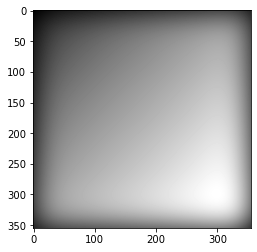

In [10]:
kernel = gaussian_kernel(150, 25)
C = scipy.signal.convolve(A, kernel, mode="same")

plt.imshow(C, cmap="gray")


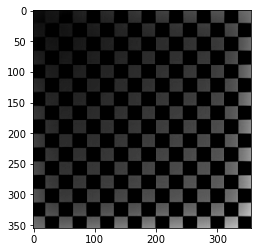

In [11]:
D = A - C
plt.imshow(D, cmap="gray", vmax=255, vmin=0)


## Otros tipos de Kernel

### Laplaciano

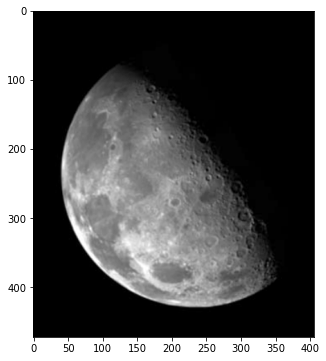

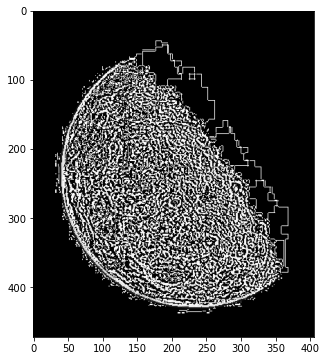

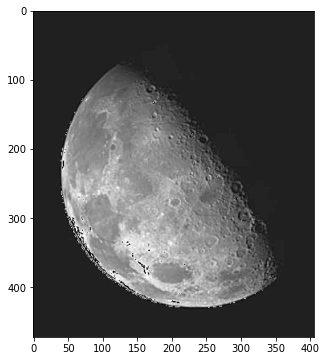

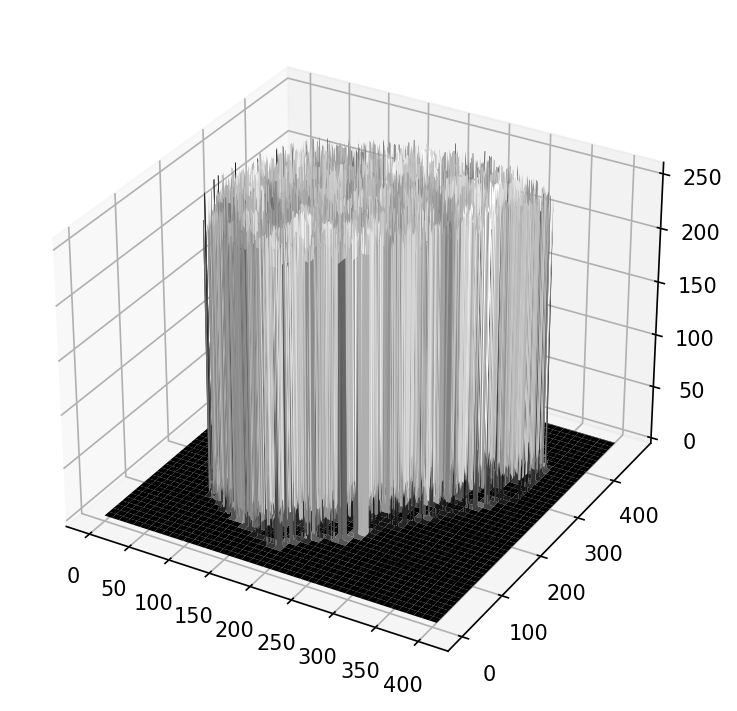

In [12]:
A = Image.open("images/laplacian.png").convert("L")
A = np.asarray(A)

kernel = np.array(
    [[0, 1, 0],
     [1, -4, 1],
     [0, 1, 0], ]
)

kernel2 = np.array(
    [[1, 1, 1],
     [1, -8, 1],
     [1, 1, 1], ]
)

plt.figure(figsize=(6, 6))
plt.imshow(A, cmap="gray")
plt.savefig("outputs/dimp 09 laplacian 00 original image.png")

B = scipy.ndimage.convolve(A, kernel)

plt.figure(figsize=(6, 6))
plt.imshow(B, cmap="gray")
plt.savefig("outputs/dimp 09 laplacian 01 convolution.png")

C = A - B

plt.figure(figsize=(6, 6))
plt.imshow(C, cmap="gray")
plt.savefig("outputs/dimp 09 laplacian 02 sharpened image.png")

Y = np.arange(0, B.shape[0])
X = np.arange(0, B.shape[1])

X, Y = np.meshgrid(X, Y)

fig, ax = plt.subplots(
    subplot_kw={"projection": "3d"}, figsize=(6, 6), dpi=150)
ax.plot_surface(X, Y, B, cmap="gray", linewidth=0, antialiased=True)


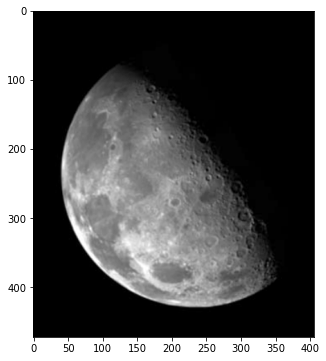

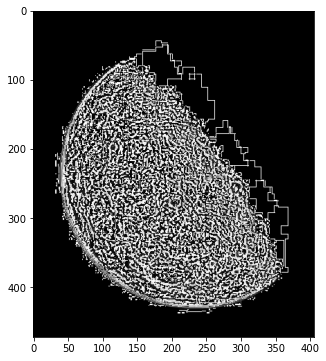

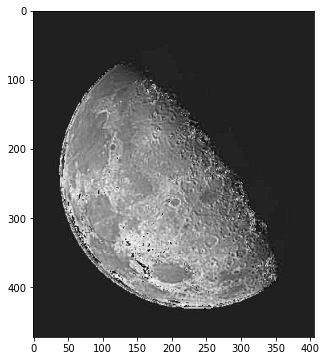

In [13]:
A = Image.open("images/laplacian.png").convert("L")
A = np.asarray(A)

kernel2 = np.array(
    [[1, 1, 1],
     [1, -8, 1],
     [1, 1, 1], ]
)

plt.figure(figsize=(6, 6))
plt.imshow(A, cmap="gray")
plt.savefig("outputs/dimp 09 laplacian 03 original image.png")

B = scipy.ndimage.convolve(A, kernel2)

plt.figure(figsize=(6, 6))
plt.imshow(B, cmap="gray")
plt.savefig("outputs/dimp 09 laplacian 04 convolution.png")

C = A - B

plt.figure(figsize=(6, 6))
plt.imshow(C, cmap="gray")
plt.savefig("outputs/dimp 09 laplacian 05 sharpened image.png")



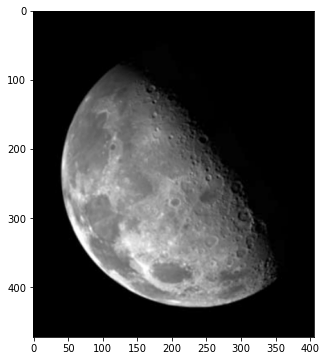

In [21]:
A = Image.open("images/laplacian.png").convert("L")
A = np.asarray(A)

B = filters.laplace(A)

B = B / B.max()

C = np.clip(A - 0.5 * B, 0, 255)
plt.figure(figsize=(6,6))
plt.imshow(C, cmap="gray")

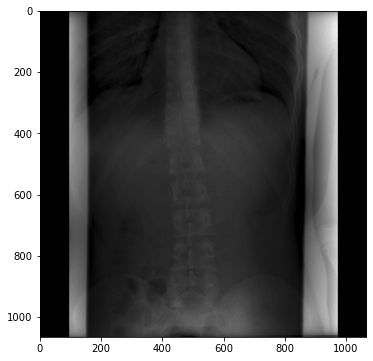

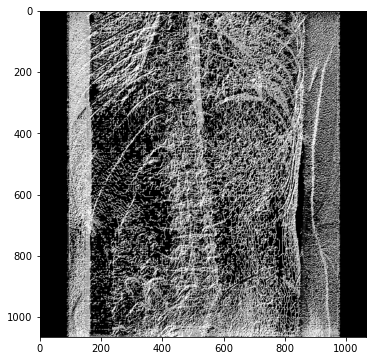

In [15]:
A = Image.open("images/a.jpg").convert("L")
A = np.asarray(A)


sx = filters.sobel(A, axis = 0)
sy = filters.sobel(A, axis = 1)

sob = np.hypot(sx, sy)

C = A + sob
plt.figure(figsize=(6,6))
plt.imshow(A, cmap="gray")

Image.fromarray(A).show()

plt.figure(figsize=(6,6))
plt.imshow(sob, cmap="gray")

# Image.fromarray(C).show()
